Dataset Shape: (689, 3)

First few rows:
        x       y   heading
0  0.0000  0.0000  269.7506
1 -0.0014 -0.0006  269.7554
2 -0.0014 -0.0006  269.7552
3 -0.0013 -0.0006  269.7556
4 -0.0012 -0.0006  269.7556

Trajectory Statistics:
Total distance traveled: 54.97 units
Start heading: 269.75°
End heading: 272.73°
Heading range: 15.31°


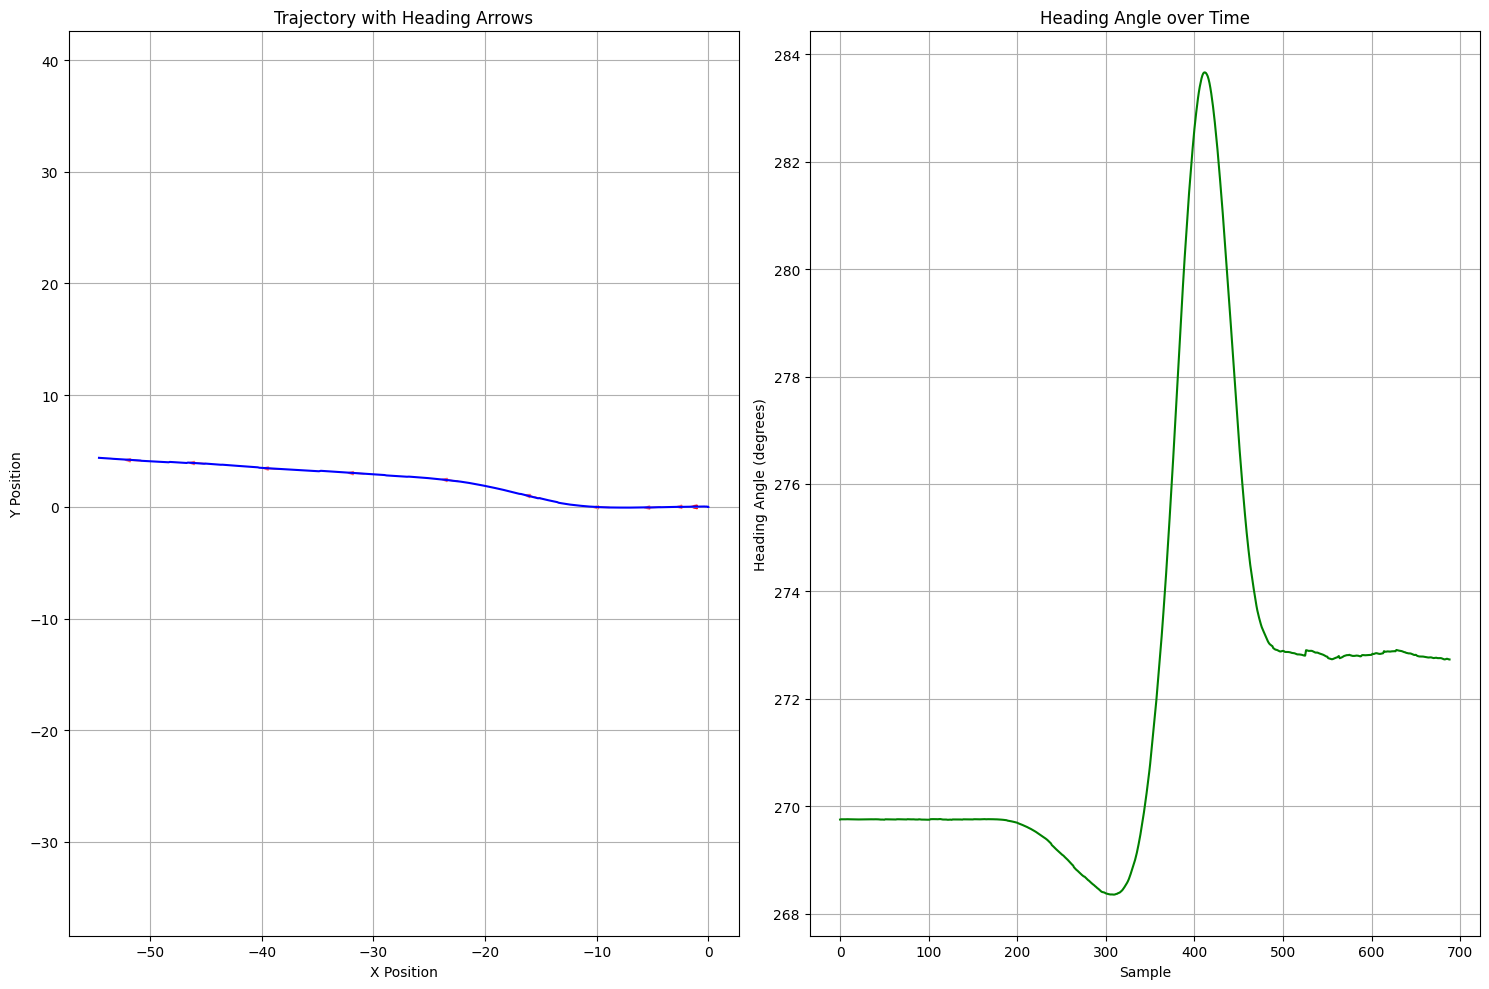

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_path):
    # 读取CSV数据，指定列名为x, y, heading
    df = pd.read_csv(file_path, header=None, names=['x', 'y', 'heading'])
    return df

def plot_trajectory_with_heading(df, arrow_spacing=50):
    plt.figure(figsize=(15, 10))

    plt.subplot(121)

    plt.plot(df['x'], df['y'], 'b-', label='Trajectory')

    for i in range(0, len(df), arrow_spacing):
        x = df['x'].iloc[i]
        y = df['y'].iloc[i]
        heading_rad = np.deg2rad(df['heading'].iloc[i]) 
        dx = np.cos(heading_rad - np.pi/2)
        dy = np.sin(heading_rad + np.pi/2)
        plt.arrow(x, y, dx, dy, 
                 head_width=0.3, 
                 head_length=0.5, 
                 fc='r', 
                 ec='r',
                 alpha=0.5)
    
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Trajectory with Heading Arrows')
    plt.grid(True)
    plt.axis('equal')  

    plt.subplot(122)
    plt.plot(df.index, df['heading'], 'g-', label='Heading Angle')
    plt.xlabel('Sample')
    plt.ylabel('Heading Angle (degrees)')
    plt.title('Heading Angle over Time')
    plt.grid(True)
    
    plt.tight_layout()

    print("\nTrajectory Statistics:")
    print(f"Total distance traveled: {calculate_distance(df):.2f} units")
    print(f"Start heading: {df['heading'].iloc[0]:.2f}°")
    print(f"End heading: {df['heading'].iloc[-1]:.2f}°")
    print(f"Heading range: {df['heading'].max() - df['heading'].min():.2f}°")
    
    plt.show()

def calculate_distance(df):
    dx = df['x'].diff()
    dy = df['y'].diff()
    distances = np.sqrt(dx**2 + dy**2)
    return distances.sum()

def main():
    # df = read_data('/home/gem/demo_ws/src/vehicle_drivers/gem_gnss_control/waypoints/xyhead_demo_pp.csv')
    df = read_data('/home/gem/demo_ws/src/vehicle_drivers/gem_gnss_control/waypoints/ag1_a.csv')

    print("Dataset Shape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())

    plot_trajectory_with_heading(df)

if __name__ == "__main__":
    main()